# Task 1

In this Task, one needs to resolve a dataset of images in 2D format. The primary tool used for this is TSNE from sklearn library. The dataset comprises of two sets of images in MNIST format. We use the Github repository given below in the links to load and read these files. There onwards, we process the data and finally we reduce the dimension of the dataset down to 2 by different methods and feed it to the TSNE network. The lower the dimension of the dataset fed to TSNE, the better it reduces the dimensions further. Therefore, firstly dimension was reduced by considering the images and resizing them down to lower dimension and the other one was done by encoding the images directly down to lower magnitude automatically.
1. https://blog.keras.io/building-autoencoders-in-keras.html 
2. https://seaborn.pydata.org/generated/seaborn.scatterplot.html 
3. https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/
4. https://github.com/zalandoresearch/fashion-mnist

Firstly we load the libraries required.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from fashion_mnist_master.utils import mnist_reader
from keras import backend as K
from keras.datasets import mnist
from sklearn.manifold import TSNE
import pandas as pd
import keras
from keras import layers
from matplotlib.pyplot import imshow
from PIL import Image
import random
import seaborn as sns
from keras.layers import Input, Dense, Flatten, Reshape, Input 
from keras.layers import InputLayer, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential, Model
from PIL import Image

From the Github Repo https://github.com/zalandoresearch/fashion-mnist, the mnist_reader() and load_mnist() functions are used in order to load and read the mnist files. Since the task requires to perform Unsupervised learning, only the datasets are exracted, and not the labels.

In [116]:
(xtrain, _)= mnist_reader.load_mnist('data/fashion', kind='train')
(xtest, _) = mnist_reader.load_mnist('data/fashion', kind='t10k')

A pandas dataframe is created to visualize the data of the Training Set. Also the shape of the data is figured out.

In [3]:
df_pre_train = pd.DataFrame(data=xtrain)
print('Raw Train dataset:',df_pre_train.shape)
print('Raw Train Data head:')
df_pre_train.head()

Raw Train dataset: (60000, 784)
Raw Train Data head:


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A pandas dataframe is created to visualize the data of the Test Set. Also the shape of the data is figured out.

In [4]:
df_pre_test = pd.DataFrame(data=xtest)
print('Raw Test dataset:',df_pre_test.shape)
print('Raw Test Data head:')
df_pre_test.head()

Raw Test dataset: (10000, 784)
Raw Test Data head:


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0


From what we see above, is that the datas are in the range of 0-255. And all of them are integers. But we need to scale it down to 0-1. This is performed in the following code block.

In [5]:
x_train = xtrain.astype('float32') / 255.
x_test = xtest.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

A pandas dataframe is created to visualize the data of the Train Set after processing. Also the shape of the data is figured out.

In [6]:
df_train = pd.DataFrame(data=x_train)
print('Train dataset:',df_train.shape)
print('Train Data head:')
df_train.head()

Train dataset: (60000, 784)
Train Data head:


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


A pandas dataframe is created to visualize the data of the Test Set after processing. Also the shape of the data is figured out.

In [7]:
df_test = pd.DataFrame(data=x_test)
print('Test dataset:',df_test.shape)
print('Test Data head:')
df_test.head()

Test dataset: (10000, 784)
Test Data head:


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


Here the raw data is visualized.

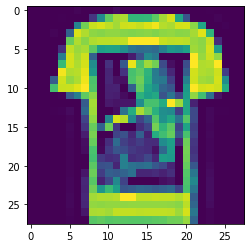

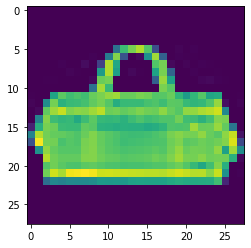

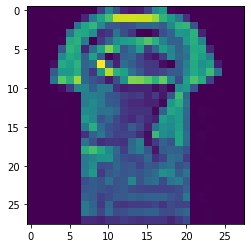

In [99]:
for i in range (0,3):
    n = random.randint(0, 10000)
    img = Image.fromarray(np.reshape(x_test[n],(28,28)))
    plt.figure()
    imshow(np.asarray(img))

In the following code block, we use a CNN to reduce the size of the MNIST dataset before feeding to TSNE from SKlearn. The layers used are Convoluted 2D, Max-pooling 2D and Upsampling 2D. Finally, the optimizer used was Adam and loss was calculated by Binary Crossentropy. The summary of the model is as such.

In [9]:
input_img = Input(shape=(24, 24, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

cnn_autoencoder = Model(input_img, decoded)
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])
cnn_autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 24, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 8)          

In this code block, using PIL library the images are read and resized to a lower dimension of 24x24 from 28x28. Therefore, a total of 208 dimensions were reduced. But with this, a lot of data was also lost. Therefore not making it the best possible way for dimension reduction in image datasets. This is image based encoding.

In [10]:
n=24
img_train=np.zeros((60000,n,n,1))
img_test=np.zeros((10000,n,n,1))
for i in range (0,60000):
    train_img = np.reshape(x_train[i],(28,28))
    img = Image.fromarray(train_img)
    img = img.resize((n,n),Image.ANTIALIAS)
    img_train[i] = np.reshape(img,(n,n,1))
for i in range (0,10000):
    test_img = np.reshape(x_test[i],(28,28))
    img = Image.fromarray(test_img)
    img = img.resize((n,n),Image.ANTIALIAS)
    img_test[i] = np.reshape(img,(n,n,1))

In the following code block, some of the random images from the reduced images were printed. The images somewhat resembled the actual images, but in the due process features were lost.

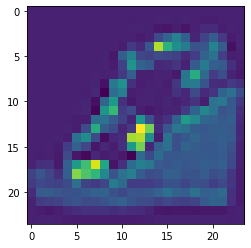

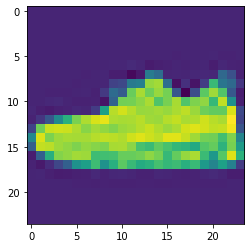

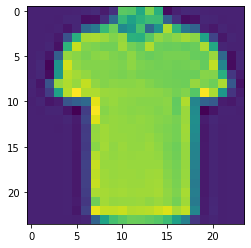

In [101]:
train_x_1 = img_train
test_x_1 = img_test
for i in range (0,3):
    n = random.randint(0, 10000)
    img = Image.fromarray(test_x_1[n,:,:,0])
    plt.figure()
    imshow(np.asarray(img))

In the next code block, the model is trained with batch size of 100 for 10 epochs.

In [12]:
history_2=cnn_autoencoder.fit(train_x_1, train_x_1,epochs=10,batch_size=100,shuffle=False,validation_data=(test_x_1, test_x_1))

Epoch 1/10
600/600 [==============================] - 44s 74ms/step - loss: 0.3543 - accuracy: 0.1910 - val_loss: 0.3149 - val_accuracy: 0.1895
Epoch 2/10
600/600 [==============================] - 43s 72ms/step - loss: 0.3090 - accuracy: 0.1911 - val_loss: 0.3076 - val_accuracy: 0.1895
Epoch 3/10
600/600 [==============================] - 43s 72ms/step - loss: 0.3034 - accuracy: 0.1911 - val_loss: 0.3034 - val_accuracy: 0.1895
Epoch 4/10
600/600 [==============================] - 44s 73ms/step - loss: 0.3000 - accuracy: 0.1911 - val_loss: 0.3007 - val_accuracy: 0.1895
Epoch 5/10
600/600 [==============================] - 42s 71ms/step - loss: 0.2977 - accuracy: 0.1911 - val_loss: 0.2989 - val_accuracy: 0.1895
Epoch 6/10
600/600 [==============================] - 43s 72ms/step - loss: 0.2962 - accuracy: 0.1911 - val_loss: 0.2976 - val_accuracy: 0.1895
Epoch 7/10
600/600 [==============================] - 44s 74ms/step - loss: 0.2950 - accuracy: 0.1911 - val_loss: 0.2969 - val_accuracy:

The model is evaluated then onwards on the test data and scored. The score is not good at all, as there is high feature loss when resizing the data down by PIL library.

In [13]:
score = cnn_autoencoder.evaluate(test_x_1, test_x_1, verbose=1)
print("Testing Performance:",score)

313/313 [==============================] - 3s 9ms/step - loss: 0.2938 - accuracy: 0.1895
Testing Performance: [0.2938324809074402, 0.18945589661598206]


Although the training was proper, as we can see the losses are reducing with the number of epochs.

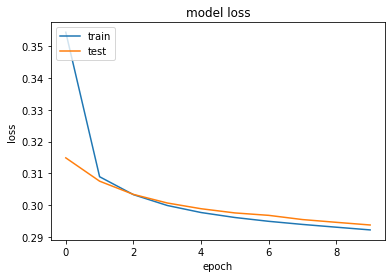

In [14]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The model is used to predict the output on the test data again in order to visualize the results. And it is seen that the outputs are hardly similar to the imagest provided to us. Although they somewhat look like the image set provided to us, but a lot of feature loss has taken place as well.

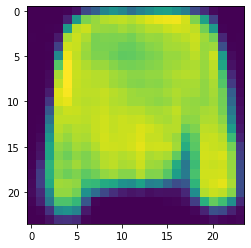

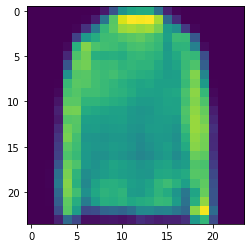

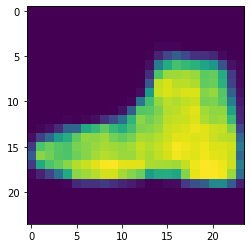

In [115]:
decoded_imgs_cnn = cnn_autoencoder.predict(test_x_1)
print(decoded_imgs_cnn.shape)
for i in range (0,3):
    n = random.randint(0, 10000)
    img = Image.fromarray(decoded_imgs_cnn[n,:,:,0])
    plt.figure()
    imshow(np.asarray(img))

Then finally the data is fed to TSNE and we the dimension considered is 10000x576 for dimension reduction to 10000x2. The decoded images are reshaped.

In [16]:
X_embedded_cnn = TSNE(n_components=2).fit_transform(decoded_imgs_cnn.reshape(10000,24*24))

A pandas dataframe is created.

In [17]:
print(X_embedded_cnn.shape)
d = {'X_val': X_embedded_cnn[:,1], 'Y_val': X_embedded_cnn[:,0]}
df_cnn = pd.DataFrame(data=d)
df_cnn.head()

(10000, 2)


,X_val,Y_val
0,40.970379,41.471676
1,10.373181,26.600311
2,-39.980274,-76.331985
3,-48.617031,-64.357353
4,-21.070248,0.609780


The 2D data is plotted.

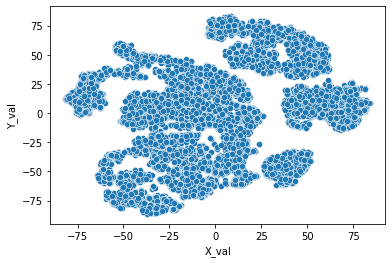

In [18]:
palette = sns.color_palette("hls", 50)
sns.scatterplot('X_val', 'Y_val', data=df_cnn,legend='brief')
plt.savefig("CNN_TSNE_Reduced_map.png")

As we see that this was not the best way to convert the dataset down to 2 dimensions, we delete this model and use the approach of feature based data encoding.

In [19]:
del cnn_autoencoder
del history_2

The data was encoded to a dimension of 256 from 784 directly by Dense accumulation from sklearn library. In this way the images present were not taken as the priority, but the features were the primarily protected. 

In [71]:
K.clear_session()

encoding_dim = 256
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
x_test_2 = encoder.predict(x_test)
x_train_2 = encoder.predict(x_train)

Like in the previous one, it is tried to plot the images again, but as we can say, due to only considering features, the images formed do not represent any from the dataset. But image features are protected.

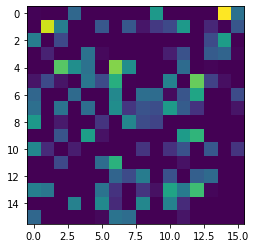

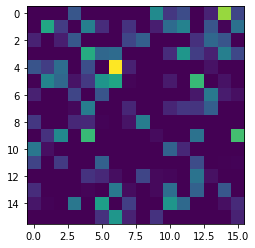

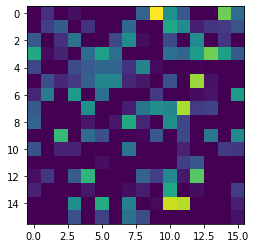

In [72]:
for i in range (0,3):
    test_img = np.reshape(x_test_2[i],(16,16))
    plt.figure()
    imshow(np.asarray(test_img))

The encoder and decoder models are made where the encoder encodes the data and the decoder decodes it as per decided after trial and testing method.

In [73]:
def build_encoderdecoder(img_shape, code_size):

    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape)))
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In the next block we prepare the training model of encoder and decoder and print the summary. So the data gets more reduced than the CNN network.

In [74]:
IMG_SHAPE = x_train_2.shape[1:]
INTERMEDIATE_SHAPE = 16
encoder, decoder = build_encoderdecoder(IMG_SHAPE, INTERMEDIATE_SHAPE)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

encoder_decoder = Model(inp,reconstruction)
encoder_decoder.compile(optimizer='adamax', loss='mse',metrics=["accuracy"])

print(encoder_decoder.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 16)                4112      
_________________________________________________________________
sequential_1 (Sequential)    (None, 256)               4352      
Total params: 8,464
Trainable params: 8,464
Non-trainable params: 0
_________________________________________________________________
None


The model is used to predict on the the test data. The mean activation and data sparsity is printed.

In [75]:
encoded_imgs = encoder_decoder.predict(x_test_2)
print("Mean activation: %f" % abs(encoded_imgs.mean()))
print("Sparsity: %f" % np.mean(encoded_imgs == 0))

Mean activation: 0.012150
Sparsity: 0.000000


The model is trained then onward.

In [76]:
history_1 = encoder_decoder.fit(x=x_train_2, y=x_train_2, epochs=10,validation_data=(x_test_2, x_test_2))

Epoch 1/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.0268 - accuracy: 0.5032 - val_loss: 0.0165 - val_accuracy: 0.6443
Epoch 2/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.0148 - accuracy: 0.6816 - val_loss: 0.0138 - val_accuracy: 0.6945
Epoch 3/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.0133 - accuracy: 0.6985 - val_loss: 0.0129 - val_accuracy: 0.7057
Epoch 4/10
1875/1875 [==============================] - 1s 800us/step - loss: 0.0128 - accuracy: 0.7080 - val_loss: 0.0127 - val_accuracy: 0.7112
Epoch 5/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.0126 - accuracy: 0.7115 - val_loss: 0.0126 - val_accuracy: 0.7106
Epoch 6/10
1875/1875 [==============================] - 1s 787us/step - loss: 0.0125 - accuracy: 0.7132 - val_loss: 0.0125 - val_accuracy: 0.7159
Epoch 7/10
1875/1875 [==============================] - 2s 857us/step - loss: 0.0125 - accuracy: 0.7132 - val_loss: 0.0125 -

The model is used to evaluate the test data and it is scored. And it is seen that it produces better accuracy than the CNN network.

In [77]:
score = encoder_decoder.evaluate(x_test_2, x_test_2, verbose=1)
print("Testing Performance:",score)

313/313 [==============================] - 0s 686us/step - loss: 0.0125 - accuracy: 0.7203
Testing Performance: [0.012469066306948662, 0.720300018787384]


The decoded images are again printed, but as expected the images do not represent the images from the image dataset, but the features are well recorded in them.

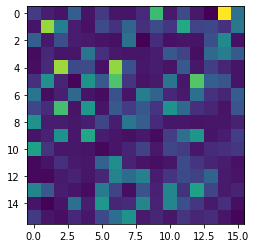

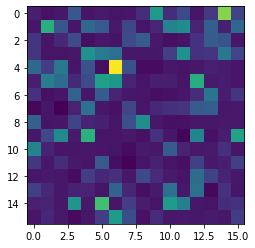

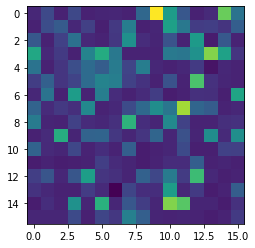

In [78]:
decoded_imgs = encoder_decoder.predict(x_test_2)
for i in range (0,3):
    test_img = np.reshape(decoded_imgs[i],(16,16))
    plt.figure()
    imshow(np.asarray(test_img))

The losses are plotted and they are reducing and almost tend to zero.

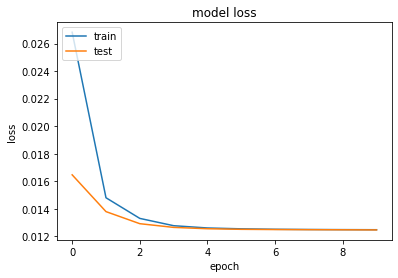

In [79]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The accuracies are plotted and they are constantly increasing, until they become stable at around 60%.

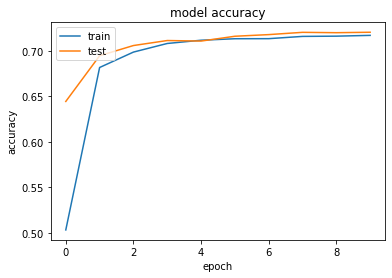

In [80]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
del encoder_decoder
del history_1

The model for predicting the 784 dimensioned data for encoded 256 dimensioned data is built

In [126]:
IMG_SHAPE = x_train.shape[1:]
INTERMEDIATE_SHAPE = 256
encoder, decoder = build_encoderdecoder(IMG_SHAPE, INTERMEDIATE_SHAPE)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

encoder_decoder_real = Model(inp,reconstruction)
encoder_decoder_real.compile(optimizer='adamax', loss='mse',metrics=["accuracy"])

print(encoder_decoder_real.summary())

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
sequential_6 (Sequential)    (None, 256)               200960    
_________________________________________________________________
sequential_7 (Sequential)    (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
None


The model is trained on original dataset.

In [127]:
history = encoder_decoder_real.fit(x=x_train, y=x_train, epochs=10,validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0202 - accuracy: 0.0279 - val_loss: 0.0094 - val_accuracy: 0.0519
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0067 - accuracy: 0.0785 - val_loss: 0.0051 - val_accuracy: 0.0967
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0044 - accuracy: 0.1134 - val_loss: 0.0040 - val_accuracy: 0.1210
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0038 - accuracy: 0.1312 - val_loss: 0.0036 - val_accuracy: 0.1312
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0035 - accuracy: 0.1362 - val_loss: 0.0034 - val_accuracy: 0.1328
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0034 - accuracy: 0.1401 - val_loss: 0.0034 - val_accuracy: 0.1319
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0033 - accuracy: 0.1423 - val_loss: 0.0033 - val_accuracy:

The model is evaluated on original test data and scored.

In [128]:
score = encoder_decoder_real.evaluate(x_test, x_test, verbose=1)
print("Testing Performance:",score)

313/313 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.1390
Testing Performance: [0.0031910899560898542, 0.13899999856948853]


The losses are plotted, and they are found to be reducing.

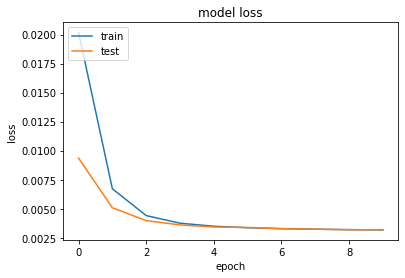

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The accuracies are plotted and they are found to be increasing for 10 epochs.

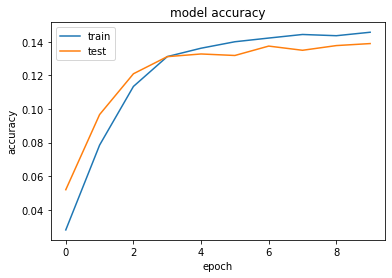

In [130]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
del history
del encoder_decoder_real

The original data of 10000x784 is fed to TSNE from sklearn library for data reduction to dimension of 2.

In [37]:
X_embedded = TSNE(n_components=2).fit_transform(x_test)

The output 2D data is converted to a pandas dataframe.

In [38]:
print(X_embedded.shape)
d = {'X_val': X_embedded[:,1], 'Y_val': X_embedded[:,0]}
df = pd.DataFrame(data=d)
df.head()

(10000, 2)


,X_val,Y_val
0,51.257534,-26.225554
1,-67.332321,-16.668098
2,12.598096,84.918587
3,8.620040,72.088623
4,-30.858774,-20.630835


The 2D data is plotted, and this represents the original data's 2D distribution.

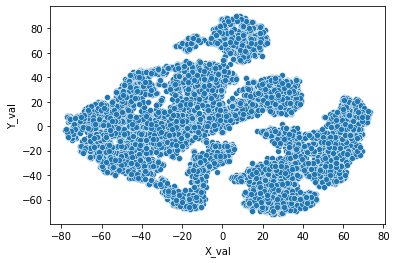

In [39]:
palette = sns.color_palette("hls", 50)
sns.scatterplot('X_val', 'Y_val', data=df,legend='brief')
plt.savefig("Only_TSNE_Reduced_map.png")

The predicted data of 10000x256 is fed to TSNE from sklearn library for data reduction to dimension of 2.

In [81]:
X_embedded_test = TSNE(n_components=2).fit_transform(x_test_2)

The 2D data is converted to a pandas dataframe.

In [82]:
print(X_embedded_test.shape)
d = {'X_val': X_embedded_test[:,1], 'Y_val': X_embedded_test[:,0]}
df_encoder = pd.DataFrame(data=d)
df_encoder.head()

(10000, 2)


,X_val,Y_val
0,-33.694351,34.873199
1,-7.817673,-71.605614
2,60.760628,39.831535
3,47.366634,41.891384
4,-17.286798,-29.906166


The 2D data is plotted. This is the encoded reduced data, predicted by Auto Encoder and then fed to TSNE.

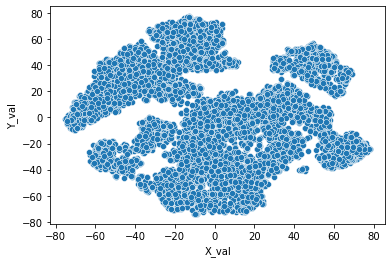

In [83]:
palette = sns.color_palette("hls", 50)
sns.scatterplot('X_val', 'Y_val', data=df_encoder,legend='brief')
plt.savefig("Autoencoder_TSNE_Reduced_map.png")

The overlapping plot is shown for autoencoder.

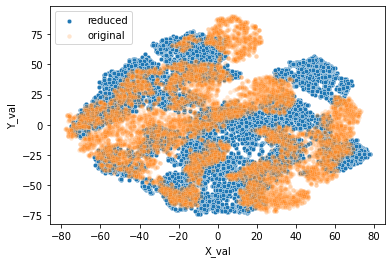

In [92]:
sns.scatterplot('X_val', 'Y_val', data=df_encoder,s=20)
sns.scatterplot('X_val', 'Y_val', data=df,s=20,alpha=0.2)
plt.legend(['reduced', 'original'], loc='upper left')
plt.savefig("Overlapping_plot_Autoencoder.png")

The overlapping plot is shown for the CNN network.

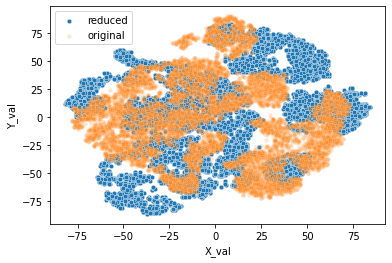

In [93]:
sns.scatterplot('X_val', 'Y_val', data=df_cnn,s=20)
sns.scatterplot('X_val', 'Y_val', data=df,s=20,alpha=0.2)
plt.legend(['reduced', 'original'], loc='upper left')
plt.savefig("Overlapping_plot_CNN.png")